In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


2024-10-08 22:11:56.729247: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-08 22:11:56.735923: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-08 22:11:56.743936: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-08 22:11:56.746233: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 22:11:56.752142: I tensorflow/core/platform/cpu_feature_guar

In [3]:
inputs = np.load("all_inputs.npy")

In [4]:
image = np.expand_dims(inputs[0],axis=0)
image.shape

(1, 1024, 1024, 1)

In [8]:
# Define diagonal kernels
kernel1 = np.array([[0, -1, 0],
                    [ -1, 5, -1],
                    [ 0, -1, 0]], dtype=np.float32)

kernel2 = np.array([[ 0, 0, -1],
                    [ 0, 1,  0],
                    [-1, 0,  0]], dtype=np.float32)


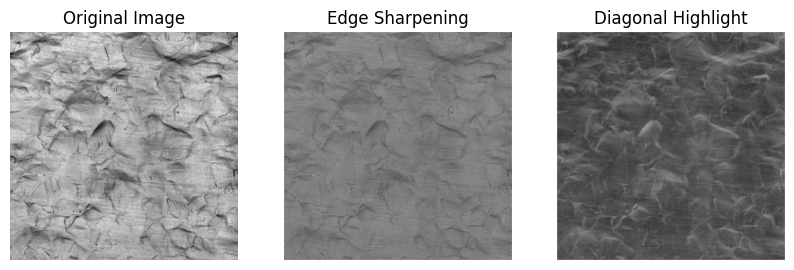

In [10]:

kernel1 = kernel1.reshape((3, 3, 1, 1))  
kernel2 = kernel2.reshape((3, 3, 1, 1)) 

# initializers
initializer1 = tf.constant_initializer(kernel1)
initializer2 = tf.constant_initializer(kernel2)


conv1 = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding='same', kernel_initializer=initializer1)
conv2 = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding='same', kernel_initializer=initializer2)


output1 = main_diag_layer(image)
output2 = anti_diag_layer(image)


fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(image[0, :, :, 0], cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(main_diag_output[0, :, :, 0], cmap='gray')
axs[1].set_title('Edge Sharpening')
axs[1].axis('off')

axs[2].imshow(anti_diag_output[0, :, :, 0], cmap='gray')
axs[2].set_title('Diagonal Highlight')
axs[2].axis('off')

plt.show()